<a href="https://colab.research.google.com/github/StefanGarcziu/DeepLearning_5semester/blob/main/DL_Zad2_StepanGarciu_135843.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

# **Simple visualization and classification of the digits dataset**

In [2]:
#import packages and load datasets

import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, train_size=0.5)

print("Image shape: ",X_train.shape)
# dimension of face image

Image shape:  (35000, 784)


# **Classify with MLP**

In [3]:
# tu musimy zdefiniować klasyfikator, wytrenować i sprawdzić "score" dla 
# danych testowych
#Proponowane parametry sieci: ukryte warstwy [100,100],solver adam, verbose=10 

clf = MLPClassifier(hidden_layer_sizes=(100,100), activation='relu', learning_rate_init=0.001, early_stopping=True, alpha=0.1, solver='adam', verbose=10, validation_fraction=0.2, max_iter=1000)
                 

print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# get prediction
probab = clf.predict_proba(X_test)[:,1] # returns probability 
print(probab)

Iteration 1, loss = 0.66298358
Validation score: 0.921286
Iteration 2, loss = 0.29605841
Validation score: 0.939286
Iteration 3, loss = 0.23843910
Validation score: 0.949286
Iteration 4, loss = 0.20522711
Validation score: 0.956571
Iteration 5, loss = 0.18513235
Validation score: 0.955857
Iteration 6, loss = 0.16860206
Validation score: 0.961857
Iteration 7, loss = 0.15509979
Validation score: 0.964000
Iteration 8, loss = 0.14544502
Validation score: 0.965000
Iteration 9, loss = 0.13471634
Validation score: 0.968000
Iteration 10, loss = 0.12843328
Validation score: 0.967714
Iteration 11, loss = 0.12384753
Validation score: 0.967286
Iteration 12, loss = 0.11823498
Validation score: 0.966571
Iteration 13, loss = 0.11314193
Validation score: 0.970857
Iteration 14, loss = 0.11101373
Validation score: 0.966143
Iteration 15, loss = 0.10649791
Validation score: 0.969429
Iteration 16, loss = 0.10402834
Validation score: 0.972714
Iteration 17, loss = 0.09949266
Validation score: 0.973429
Iterat

[0.9212857142857143, 0.9392857142857143, 0.9492857142857143, 0.9565714285714285, 0.9558571428571428, 0.9618571428571429, 0.964, 0.965, 0.968, 0.9677142857142857, 0.9672857142857143, 0.9665714285714285, 0.9708571428571429, 0.9661428571428572, 0.9694285714285714, 0.9727142857142858, 0.9734285714285714, 0.9741428571428571, 0.9701428571428572, 0.972, 0.9711428571428572, 0.9705714285714285, 0.9701428571428572, 0.9695714285714285, 0.9721428571428572, 0.9711428571428572, 0.9724285714285714, 0.9722857142857143, 0.9654285714285714]


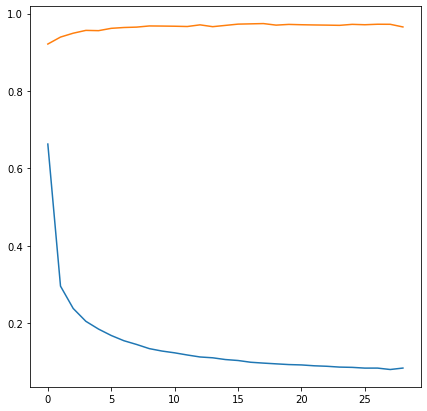

In [4]:
# tu rysujemy loss i validation score
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

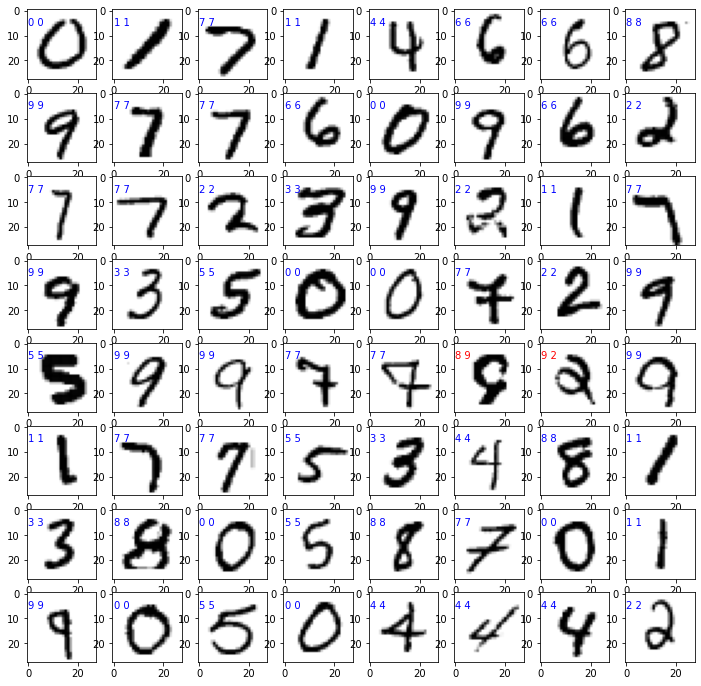

In [5]:
# Plot the prediction
fig = plt.figure(figsize=(12, 12)) #figure size in inches
predicted = clf.predict(X_test)

# Tu rysujemy cyfry z wynikami
#plot the digits: each image is 28x28 pixels
for i in range(64):
  ax = fig.add_subplot(8, 8, i + 1)
  ax.imshow(X_test[i].reshape(28,28),cmap=plt.cm.binary)
  if y_test[i] == predicted[i]:
    ax.text(0,6,predicted[i] + ' ' + y_test[i], color='blue')
  else:
    ax.text(0,6,predicted[i] + ' ' + y_test[i], color='red')

# **Print the confusion matrix (expected true label vs. the reconstructed label)**

In [6]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3409
           1       0.98      0.99      0.98      3949
           2       0.98      0.96      0.97      3500
           3       0.96      0.96      0.96      3557
           4       0.97      0.98      0.97      3398
           5       0.98      0.95      0.96      3203
           6       0.98      0.98      0.98      3444
           7       0.96      0.98      0.97      3637
           8       0.96      0.96      0.96      3437
           9       0.96      0.96      0.96      3466

    accuracy                           0.97     35000
   macro avg       0.97      0.97      0.97     35000
weighted avg       0.97      0.97      0.97     35000



In [7]:
print(metrics.confusion_matrix(y_test, predicted))

[[3364    0    4    4    2    5   15    2    9    4]
 [   1 3897   15    7    5    0    1   12    8    3]
 [  19   10 3366   24   11    2    9   38   19    2]
 [   1    9   18 3429    0   28    2   22   30   18]
 [   4    4   11    1 3325    0    7   11    9   26]
 [  17    8    5   48    5 3047   25    3   23   22]
 [  17    9    3    1   20   14 3366    2   12    0]
 [   1   11   16    7   11    1    1 3560    1   28]
 [  13   24   11   46    6   10   10    6 3292   19]
 [   9   11    2   20   38    7    3   36   21 3319]]


# **Repeat the same classification for faces**

In [8]:
####################################################
# Load dataset with faces
from sklearn.datasets import fetch_lfw_people

# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.50)  
print(lfw_people.images.shape)


# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
# to get real names, not digits
target_names = lfw_people.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print("Image shape: ",X_train.shape)
# dimension of face image
nfaces, h, w = lfw_people.images.shape
print("Image shape: ", h, w)

(1140, 62, 47)
Image shape:  (855, 2914)
Image shape:  62 47


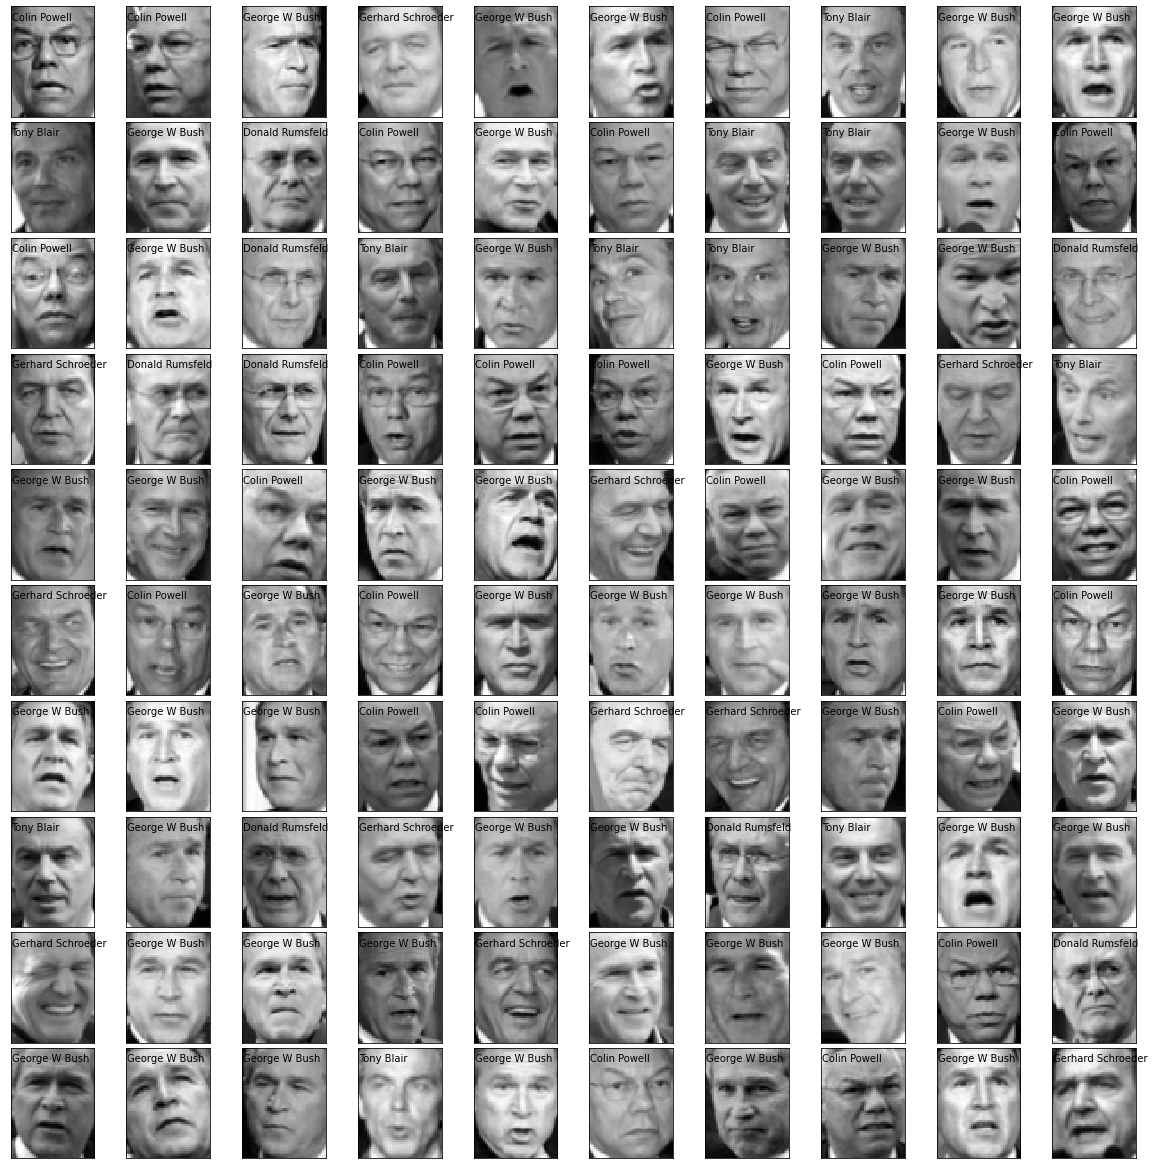

In [9]:
# tu rysujemy twarze
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 16)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(100):
  ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
  # label the image with the target value
  ax.text(0, 7, str(target_names[y_test[i]]))

# **Classify with MLP**

In [10]:
# train the model
clf = MLPClassifier(hidden_layer_sizes=(100,100), activation='relu', alpha=1, learning_rate_init=0.001, early_stopping=True, 
                    solver='adam', verbose=10, validation_fraction=0.2, max_iter=1000, n_iter_no_change=90)                

print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# get prediction
probab2 = clf.predict_proba(X_test)[:,1] # returns probability 
print(probab2)

Iteration 1, loss = inf
Validation score: 0.438596
Iteration 2, loss = inf
Validation score: 0.438596
Iteration 3, loss = inf
Validation score: 0.146199
Iteration 4, loss = 90.03702767
Validation score: 0.146199
Iteration 5, loss = 52.47315228
Validation score: 0.198830
Iteration 6, loss = 50.84693399
Validation score: 0.368421
Iteration 7, loss = 48.15977040
Validation score: 0.461988
Iteration 8, loss = 47.54076084
Validation score: 0.146199
Iteration 9, loss = 38.39246810
Validation score: 0.245614
Iteration 10, loss = 14.69994001
Validation score: 0.461988
Iteration 11, loss = 14.60226248
Validation score: 0.374269
Iteration 12, loss = 19.64605651
Validation score: 0.327485
Iteration 13, loss = 13.79948563
Validation score: 0.485380
Iteration 14, loss = 16.72197701
Validation score: 0.502924
Iteration 15, loss = 16.87061928
Validation score: 0.567251
Iteration 16, loss = 14.68323148
Validation score: 0.368421
Iteration 17, loss = 19.71933553
Validation score: 0.438596
Iteration 18,

# **Plot loss**

[0.43859649122807015, 0.43859649122807015, 0.14619883040935672, 0.14619883040935672, 0.19883040935672514, 0.3684210526315789, 0.4619883040935672, 0.14619883040935672, 0.24561403508771928, 0.4619883040935672, 0.3742690058479532, 0.32748538011695905, 0.4853801169590643, 0.5029239766081871, 0.5672514619883041, 0.3684210526315789, 0.43859649122807015, 0.30409356725146197, 0.47368421052631576, 0.2982456140350877, 0.4152046783625731, 0.47953216374269003, 0.4619883040935672, 0.2573099415204678, 0.5555555555555556, 0.672514619883041, 0.6140350877192983, 0.5497076023391813, 0.6198830409356725, 0.6257309941520468, 0.6198830409356725, 0.5847953216374269, 0.6081871345029239, 0.6140350877192983, 0.6549707602339181, 0.6549707602339181, 0.5672514619883041, 0.7251461988304093, 0.7017543859649122, 0.7192982456140351, 0.695906432748538, 0.6491228070175439, 0.672514619883041, 0.7017543859649122, 0.6374269005847953, 0.6140350877192983, 0.5730994152046783, 0.6140350877192983, 0.6257309941520468, 0.71929824

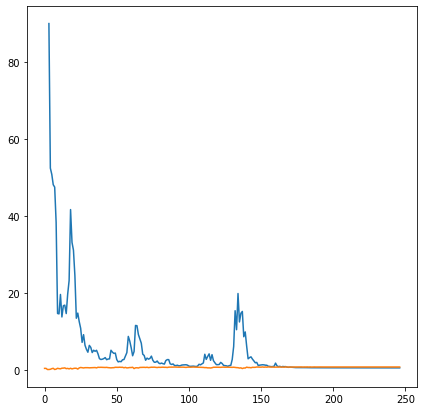

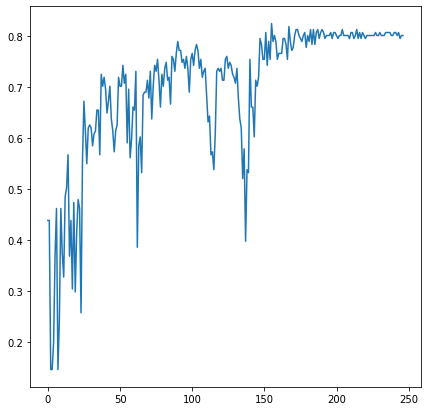

In [11]:
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

fig=plt.figure(figsize=(7,7))

#plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

# **Plot results**

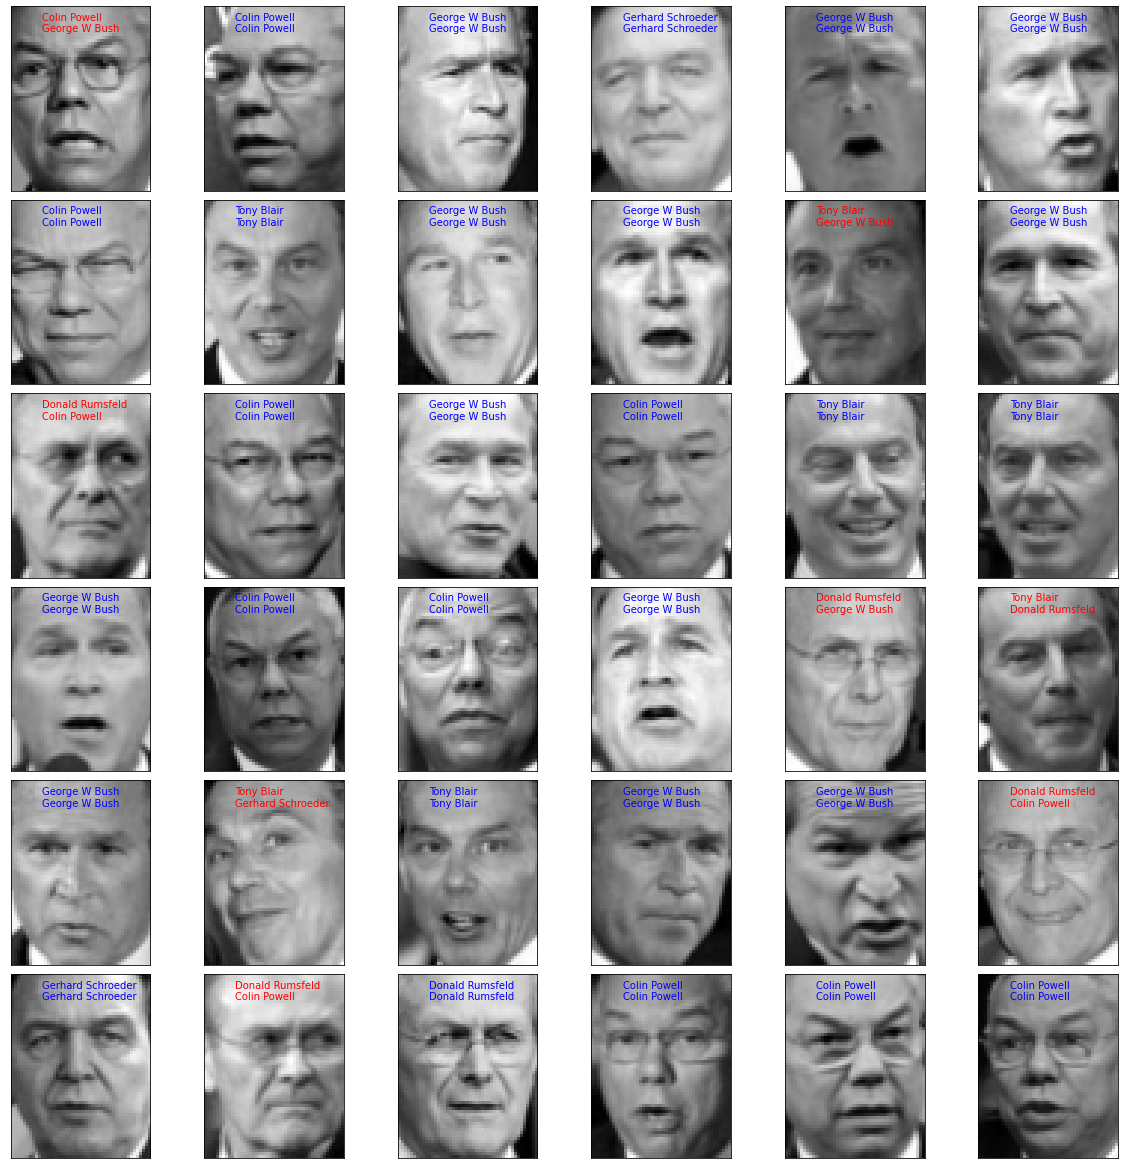

In [12]:
# Plot the prediction
predicted = clf.predict(X_test)

fig = plt.figure(figsize=(16, 16)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(36):
  ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
  # label the image with the target value
  if y_test[i] == predicted[i]:
    ax.text(10, 8, str(target_names[y_test[i]]) +"\n"+ str(target_names[predicted[i]]), color='blue')
  else:
    ax.text(10, 8, str(target_names[y_test[i]]) +"\n"+ str(target_names[predicted[i]]), color='red')

Print the classification report

In [13]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        64
           1       0.79      0.47      0.59        32
           2       0.82      0.92      0.87       127
           3       0.79      0.66      0.72        29
           4       0.85      0.67      0.75        33

    accuracy                           0.81       285
   macro avg       0.81      0.72      0.75       285
weighted avg       0.81      0.81      0.80       285



# **Print the confusion matrix (expected true label vs. the reconstructed label)**

In [14]:
print(metrics.confusion_matrix(y_test, predicted))

[[ 58   0   4   0   2]
 [  7  15   7   2   1]
 [  6   3 117   1   0]
 [  2   0   7  19   1]
 [  0   1   8   2  22]]
